In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()
df= pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Final Project/fraud_dataset_example.csv")

In [2]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


In [3]:
# Number of rows and columns are 
print("The shape of data is ", df.shape)

The shape of data is  (101613, 11)


In [4]:
# The number of null values in dataframe are 
print("The shape of data is ", df.isna().sum())

The shape of data is  step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='isFraud', ylabel='count'>

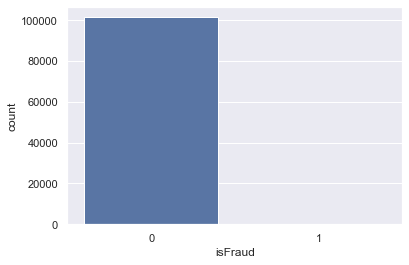

In [5]:
# Visulization 
sns.countplot(df.isFraud)

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='type', ylabel='count'>

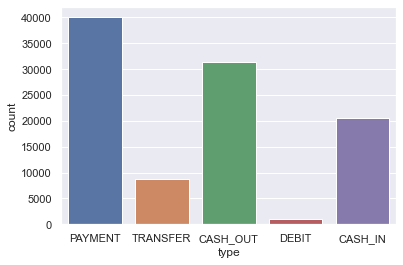

In [6]:
sns.countplot(df.type)

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='nameOrig', ylabel='count'>

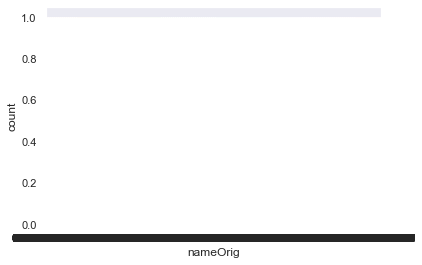

In [7]:
sns.countplot(df.nameOrig)

C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='nameDest', ylabel='count'>

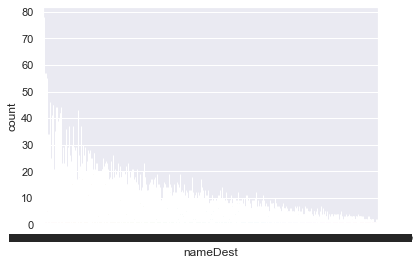

In [8]:
sns.countplot(df.nameDest)

array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

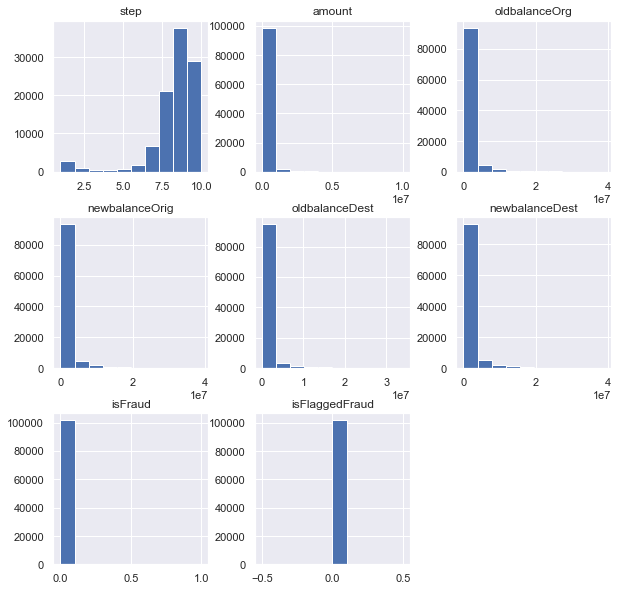

In [9]:
df.hist(figsize=(10,10),bins=10)

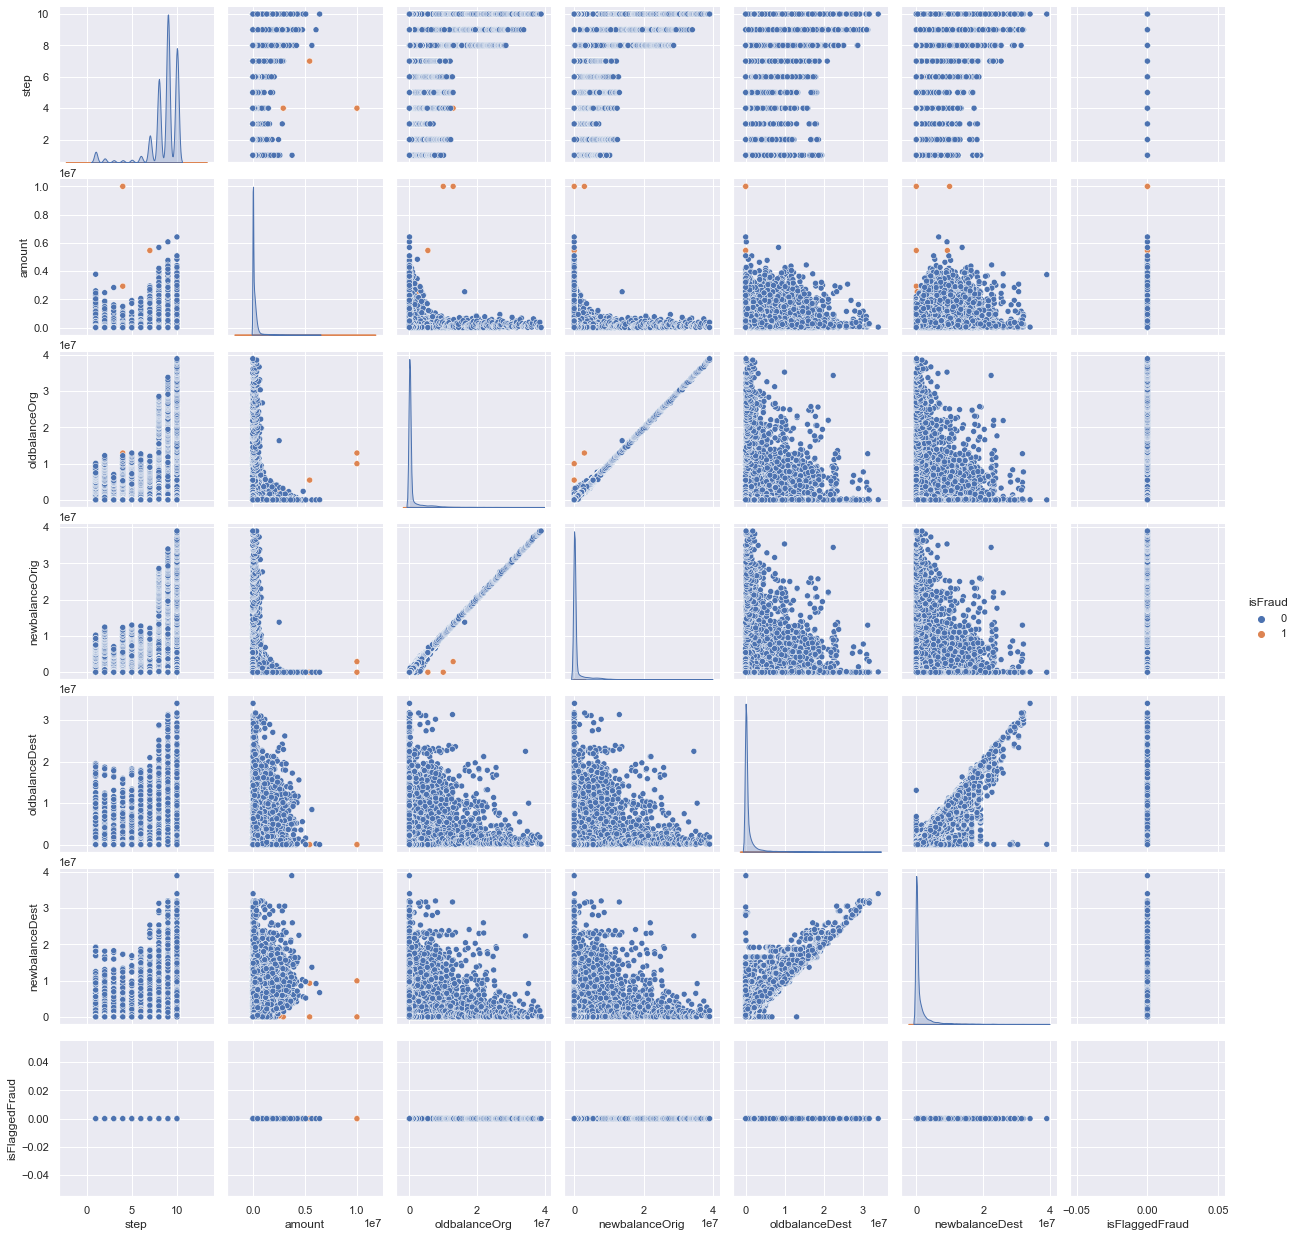

In [10]:
sns.pairplot(df, hue="isFraud")

In [11]:
# To find the number of fraud and no-fraud in each column isFraud	isFlaggedFraud
print("Frequency count in column isFraud")
print(df["isFraud"].value_counts())
print("Frequency count in column isFlaggedFraud")
print(df["isFlaggedFraud"].value_counts())

Frequency count in column isFraud
0    101497
1       116
Name: isFraud, dtype: int64
Frequency count in column isFlaggedFraud
0    101613
Name: isFlaggedFraud, dtype: int64


# There are only and only 116 values are present for the fraud class and around 101497 is present of no fraud so an overasmpling techniqe will be used to increase the values of fraud class

In [12]:
print("The name of columns are",df.columns)

The name of columns are Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [13]:
# Label encoding the type of payment for further processing 
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['type']= label_encoder.fit_transform(df['type'])
  
df['type'].unique()

array([3, 4, 1, 2, 0])

In [14]:
# Droppinf the column name nameOrig, nameDest , and isFlaggedFraud as they will not be contributing in the classification of the model 
df = df.drop(['nameOrig', 'nameDest' , 'isFlaggedFraud'], axis=1)

In [15]:
print("The new data frame is ")
print(df)

The new data frame is 
        step  type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0          1     3     9839.64      170136.00       160296.36            0.00   
1          1     3     1864.28       21249.00        19384.72            0.00   
2          1     4      181.00         181.00            0.00            0.00   
3          1     1      181.00         181.00            0.00        21182.00   
4          1     3    11668.14       41554.00        29885.86            0.00   
...      ...   ...         ...            ...             ...             ...   
101608    10     3     7477.02         785.00            0.00            0.00   
101609    10     1   282252.35      220339.29            0.00        95156.01   
101610    10     3    17289.01           0.00            0.00            0.00   
101611    10     4  1347146.45        1605.00            0.00       541639.43   
101612    10     1   469539.21       31133.00            0.00            0.00   

    

In [16]:
y = df["isFraud"]
X =  df.drop(['isFraud'], axis=1)

In [17]:
!! pip install imblearn

['Requirement already satisfied: imblearn in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (0.0)',
 'Requirement already satisfied: imbalanced-learn in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from imblearn) (0.9.0)',
 'Requirement already satisfied: threadpoolctl>=2.0.0 in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from imbalanced-learn->imblearn) (2.2.0)',
 'Requirement already satisfied: numpy>=1.14.6 in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from imbalanced-learn->imblearn) (1.21.5)',
 'Requirement already satisfied: joblib>=0.11 in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from imbalanced-learn->imblearn) (1.1.0)',
 'Requirement already satisfied: scipy>=1.1.0 in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from imbalanced-learn->imblearn) (1.7.3)',
 'Requirement already satisfied: scikit-learn>=1.0.1 in c:\\users\\dell\\anaconda3\\envs\\tensor

In [18]:
# Applying the SMOTE
from imblearn.over_sampling import SMOTE
X_smote, y_smote = SMOTE(random_state=1234).fit_resample(X, y)
smote_value_counts = y_smote.value_counts()
print("Fraudulent transactions are %.2f%% of the test set." % (smote_value_counts[0] * 100 / len(y_smote)))

Fraudulent transactions are 50.00% of the test set.


C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='isFraud', ylabel='count'>

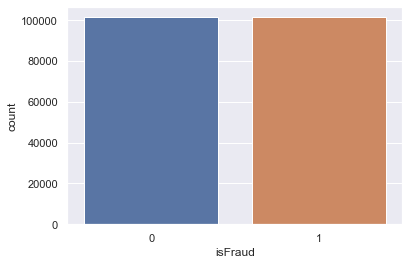

In [19]:
# The number of data points after oversampling is 
sns.countplot(y_smote)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.33, random_state=42)



In [21]:
!!pip install xgboost

['Requirement already satisfied: xgboost in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (1.6.1)',
 'Requirement already satisfied: numpy in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from xgboost) (1.21.5)',
 'Requirement already satisfied: scipy in c:\\users\\dell\\anaconda3\\envs\\tensorflow\\lib\\site-packages (from xgboost) (1.7.3)']

In [22]:
# Applying the Xgboost classifier 

def xgboost_search(X, y, search_verbose=1):
    params = {
    "gamma":[0.5, 1],
    "max_depth":[3,4],
    "subsample": [0.6, 0.8],
    "colsample_bytree": [0.6],
    "learning_rate": [0.001]
    }
    xgb = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)

    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=1234)

    grid_search = GridSearchCV(estimator=xgb, param_grid=params, scoring="roc_auc", n_jobs=1, cv=skf.split(X,y), verbose=search_verbose)

    grid_search.fit(X, y)

    print("Best estimator: ")
    print(grid_search.best_estimator_)
    print("Parameters: ", grid_search.best_params_)
    print("Highest AUC: %.2f" % grid_search.best_score_)

    return grid_search.best_params_

In [23]:
X_train.shape

(136005, 7)

In [24]:
import random
from xgboost import XGBClassifier
from xgboost import Booster
from xgboost import DMatrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
rows = random.sample(np.arange(0,len(X_train.index)).tolist(), 136005)
model_params = xgboost_search(X_train.iloc[rows,], y_train.iloc[rows,])

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best estimator: 
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
Parameters:  {'colsample_bytree': 0.6, 'gamma': 0.5, 'learning_rate': 0.001, 'max_depth': 4, 'subsample': 0.6}
Highest AUC: 0.99


In [25]:
model = XGBClassifier(objective="binary:logistic", eval_metric="auc", use_label_encoder=False)
model.set_params(**model_params)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', gamma=0.5, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

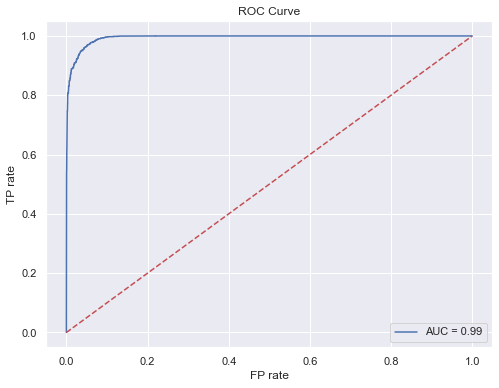

In [26]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)[:,1]
fp_r, tp_r, t = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fp_r, tp_r)
plt.figure(figsize=(8, 6))
plt.plot(fp_r, tp_r, label="AUC = %.2f" % auc)
plt.plot([0,1],[0,1],"r--")
plt.ylabel("TP rate")
plt.xlabel("FP rate")
plt.legend(loc=4)
plt.title("ROC Curve")
plt.show()

In [27]:
from sklearn.metrics import classification_report
y_pred_new = model.predict(X_test)
print(classification_report(y_test, y_pred_new))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     33359
           1       0.96      0.95      0.96     33630

    accuracy                           0.96     66989
   macro avg       0.96      0.96      0.96     66989
weighted avg       0.96      0.96      0.96     66989



In [28]:
# Applying the SVM 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
 
model = SVC()
model.fit(X_train, y_train)
 
# print prediction results
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.95      0.66      0.78     33359
           1       0.74      0.96      0.84     33630

    accuracy                           0.81     66989
   macro avg       0.84      0.81      0.81     66989
weighted avg       0.84      0.81      0.81     66989



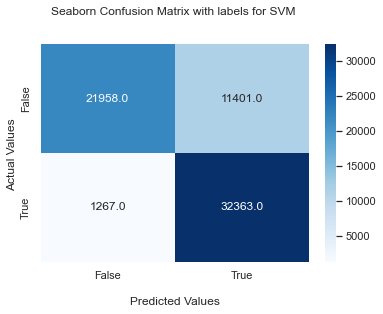

In [29]:
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predictions)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels for SVM \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [30]:
# lOGISTIC RGRESSION 
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     33359
           1       0.93      0.96      0.94     33630

    accuracy                           0.94     66989
   macro avg       0.94      0.94      0.94     66989
weighted avg       0.94      0.94      0.94     66989



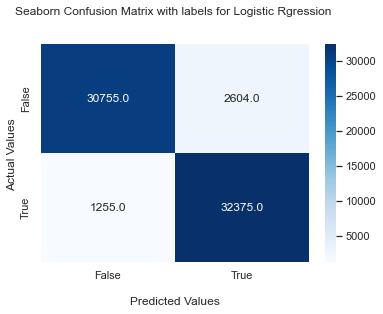

In [31]:
# print prediction results
predictions_log = logisticRegr.predict(X_test)
print(classification_report(y_test, predictions_log))
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predictions_log)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels for Logistic Rgression \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [32]:
# Building a CNN 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam
print(tf.__version__)
from sklearn.preprocessing import StandardScaler

2.3.0


In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [34]:
X_train.shape, X_test.shape

((136005, 7, 1), (66989, 7, 1))

In [35]:
## CNN model
epochs = 20
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6, 32)             96        
_________________________________________________________________
batch_normalization (BatchNo (None, 6, 32)             128       
_________________________________________________________________
dropout (Dropout)            (None, 6, 32)             0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 5, 64)             4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 64)             256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0

In [37]:
model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])

In [38]:
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
4251/4251 [==============================] - 16s 4ms/step - loss: 0.3719 - accuracy: 0.8434 - val_loss: 0.1822 - val_accuracy: 0.9242
Epoch 2/20
4251/4251 [==============================] - 15s 3ms/step - loss: 0.2336 - accuracy: 0.9080 - val_loss: 0.1485 - val_accuracy: 0.9409
Epoch 3/20
4251/4251 [==============================] - 15s 4ms/step - loss: 0.1982 - accuracy: 0.9224 - val_loss: 0.1380 - val_accuracy: 0.9467
Epoch 4/20
4251/4251 [==============================] - 15s 3ms/step - loss: 0.1776 - accuracy: 0.9309 - val_loss: 0.1289 - val_accuracy: 0.9507
Epoch 5/20
4251/4251 [==============================] - 14s 3ms/step - loss: 0.1659 - accuracy: 0.9346 - val_loss: 0.1218 - val_accuracy: 0.9526
Epoch 6/20
4251/4251 [==============================] - 15s 4ms/step - loss: 0.1580 - accuracy: 0.9377 - val_loss: 0.1197 - val_accuracy: 0.9563
Epoch 7/20
4251/4251 [==============================] - 15s 4ms/step - loss: 0.1500 - accuracy: 0.9408 - val_loss: 0.1130 - val_ac

In [39]:
def plot_learningCurve(history, epoch):
    # Plot training & validation accuracy values
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

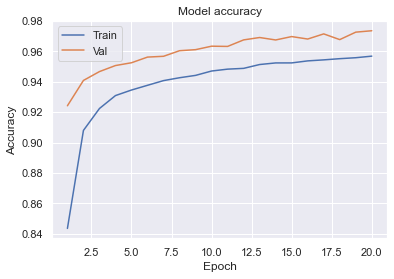

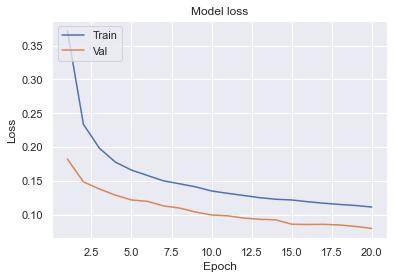

In [40]:
plot_learningCurve(history, epochs)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     33359
           1       0.97      0.98      0.97     33630

    accuracy                           0.97     66989
   macro avg       0.97      0.97      0.97     66989
weighted avg       0.97      0.97      0.97     66989



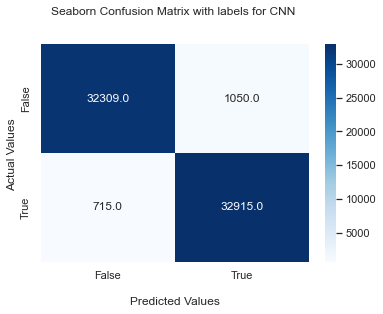

In [41]:
predictions_CNN = model.predict(X_test)
print(classification_report(y_test, predictions_CNN.round()))
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predictions_CNN.round())

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels for CNN \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

Epoch 1/50
4251/4251 [==============================] - 12s 3ms/step - loss: 0.4751 - accuracy: 0.7910 - val_loss: 0.2301 - val_accuracy: 0.9154
Epoch 2/50
4251/4251 [==============================] - 11s 3ms/step - loss: 0.3054 - accuracy: 0.8804 - val_loss: 0.1803 - val_accuracy: 0.9306
Epoch 3/50
4251/4251 [==============================] - 11s 3ms/step - loss: 0.2546 - accuracy: 0.9028 - val_loss: 0.1653 - val_accuracy: 0.9388
Epoch 4/50
4251/4251 [==============================] - 11s 3ms/step - loss: 0.2312 - accuracy: 0.9120 - val_loss: 0.1547 - val_accuracy: 0.9434
Epoch 5/50
4251/4251 [==============================] - 12s 3ms/step - loss: 0.2137 - accuracy: 0.9198 - val_loss: 0.1469 - val_accuracy: 0.9449
Epoch 6/50
4251/4251 [==============================] - 12s 3ms/step - loss: 0.2025 - accuracy: 0.9236 - val_loss: 0.1417 - val_accuracy: 0.9501
Epoch 7/50
4251/4251 [==============================] - 12s 3ms/step - loss: 0.1955 - accuracy: 0.9261 - val_loss: 0.1344 - val_ac

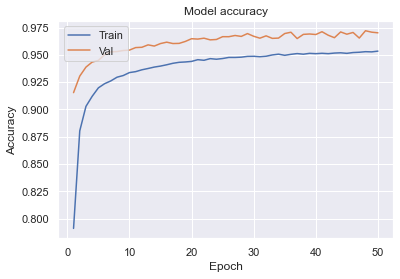

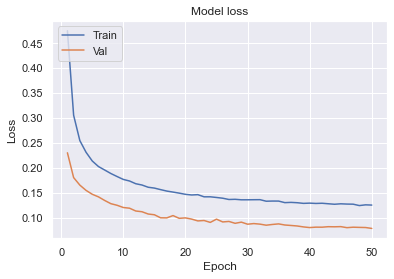

In [42]:
# Changing CNN By Adding the Max Pool Layer
epochs = 50
model = Sequential()
model.add(Conv1D(32, 2, activation='relu', input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)
plot_learningCurve(history, epochs)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     33359
           1       0.98      0.96      0.97     33630

    accuracy                           0.97     66989
   macro avg       0.97      0.97      0.97     66989
weighted avg       0.97      0.97      0.97     66989



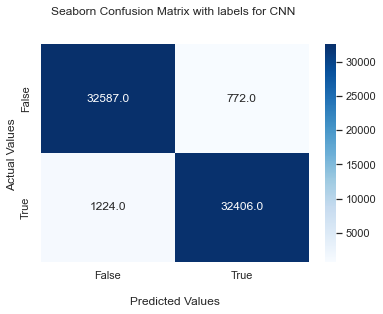

In [43]:
predictions_CNN = model.predict(X_test)
print(classification_report(y_test, predictions_CNN.round()))
import seaborn as sns
cf_matrix = confusion_matrix(y_test, predictions_CNN.round())

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues',fmt=".1f")

ax.set_title('Seaborn Confusion Matrix with labels for CNN \n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()